In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#data = pd.read_csv('D:\\Projects\Data\\train.csv',nrows = 10000000)       # Contains the first 10 million data from 
                                                    # where we are going to select 1 million ramdom data for training and
                                                    # ten thousand data for deveopment 


In [2]:
# Creation of training set , development set and test set 
#training_set = data.sample(n = 1000000 , replace = False)    # 1 million random data from same distribution
#dev_set = data.sample(n = 10000 , replace = False)           # 10000 random data from same distribution

training_set = pd.read_csv('D:\\Projects\\Data\\training_set.csv')
dev_set = pd.read_csv('D:\\Projects\\Data\\dev_set.csv')
test_set =  pd.read_csv('D:\\Projects\\Data\\test.csv')      # Actual test data must be used to check only after getting 
                                                             # a good final hypothesis

# Shape, data type, data sample and descriptive statistics of Training Set

### Shape

In [3]:
training_set.shape

(1000000, 9)

### Data Type

In [4]:
training_set.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Data Sample

In [5]:
training_set.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4269478,2009-09-16 18:30:43.0000003,10.5,2009-09-16 18:30:43 UTC,-73.956166,40.780095,-73.991168,40.760530,1
1,6753615,2014-08-12 19:51:00.00000058,5.5,2014-08-12 19:51:00 UTC,-73.988327,40.755127,-73.998407,40.743605,4
2,638871,2010-01-03 17:13:00.000000176,45.0,2010-01-03 17:13:00 UTC,-73.928602,40.736587,-73.989305,40.741353,1
3,7919773,2015-04-25 08:09:21.0000002,13.5,2015-04-25 08:09:21 UTC,-73.993828,40.766972,-73.988037,40.733788,1
4,9894903,2012-08-30 20:25:00.000000140,4.1,2012-08-30 20:25:00 UTC,-73.973805,40.749402,-73.976080,40.745798,2


### Descriptive statistics 

In [6]:
training_set.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,4.998092e+06,11.327224,-72.510856,39.922976,-72.524769,39.929467,1.687086
std,2.887434e+06,9.801694,12.799880,9.821773,13.494402,9.013604,1.310834
min,5.000000e+00,-62.000000,-3007.205450,-3258.765613,-3426.600617,-2864.471003,0.000000
25%,2.496564e+06,6.000000,-73.992075,40.734953,-73.991394,40.734068,1.000000
50%,4.992960e+06,8.500000,-73.981834,40.752617,-73.980186,40.753142,1.000000
75%,7.499348e+06,12.500000,-73.967073,40.767123,-73.963725,40.768071,2.000000
max,9.999998e+06,952.000000,2522.271325,3001.930510,2497.105768,2950.087992,9.000000


# Shape, data type, data sample and descriptive statistics of Development Set

### Shape

In [7]:
dev_set.shape

(10000, 9)

### Data Type

In [8]:
dev_set.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Data Sample

In [9]:
dev_set.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,5406611,2012-11-18 18:24:00.000000116,8.5,2012-11-18 18:24:00 UTC,-73.961455,40.765132,-73.976322,40.744262,1
1,6747269,2009-06-03 21:22:00.0000003,6.1,2009-06-03 21:22:00 UTC,-73.952222,40.787170,-73.963823,40.769275,1
2,327803,2010-10-23 23:45:50.0000003,20.1,2010-10-23 23:45:50 UTC,-74.004992,40.741375,-73.983108,40.670276,1
3,862905,2013-09-15 15:03:59.0000001,8.0,2013-09-15 15:03:59 UTC,-74.012050,40.715985,-74.012362,40.720336,2
4,9942124,2014-03-27 17:59:00.00000093,4.5,2014-03-27 17:59:00 UTC,-73.961375,40.760622,-73.954577,40.765732,1


### Descriptive statistics 

In [10]:
dev_set.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.035986e+06,11.476045,-72.470719,39.891178,-72.486662,39.903932,1.688500
std,2.884860e+06,10.124174,10.573926,6.275024,10.519467,6.237804,1.292453
min,2.840000e+02,0.010000,-75.338380,-74.010755,-78.562860,-74.002347,0.000000
25%,2.536053e+06,6.000000,-73.991816,40.734031,-73.991257,40.734249,1.000000
50%,5.044119e+06,8.500000,-73.981706,40.752599,-73.979504,40.753197,1.000000
75%,7.540420e+06,12.500000,-73.966705,40.767076,-73.963210,40.768144,2.000000
max,9.997197e+06,124.100000,40.770792,41.366138,40.778532,47.065774,6.000000


# Shape, data type, data sample and descriptive statistics of Test Set



### Shape

In [11]:
test_set.shape

(9914, 7)

### Data Type

In [12]:
test_set.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Data Sample

In [13]:
test_set.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


### Descriptive statistics 

In [14]:
test_set.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Data Cleansing

## Removing Null values from the datasets

In [15]:
training_set.isnull().sum().sort_values(ascending = False)

dropoff_latitude     10
dropoff_longitude    10
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
key                   0
Unnamed: 0            0
dtype: int64

In [16]:
dev_set.isnull().sum().sort_values(ascending = False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
Unnamed: 0           0
dtype: int64

In [17]:
test_set.isnull().sum().sort_values(ascending = False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
key                  0
dtype: int64

In [18]:
training_set = training_set.drop(training_set[training_set.isnull().any(1)].index , axis = 0)
training_set.shape

(999990, 9)

In [19]:
dev_set = dev_set.drop(dev_set[dev_set.isnull().any(1)].index , axis = 0)
dev_set.shape

(10000, 9)

In [20]:
test_set = test_set.drop(test_set[test_set.isnull().any(1)].index , axis = 0)
test_set.shape

(9914, 7)

## Removing rows from the dataset having invalid data 

In [21]:
training_set.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9.999900e+05,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,4.998108e+06,11.327083,-72.510916,39.923008,-72.524769,39.929467,1.687103
std,2.887434e+06,9.801195,12.799738,9.821741,13.494402,9.013604,1.310829
min,5.000000e+00,-62.000000,-3007.205450,-3258.765613,-3426.600617,-2864.471003,0.000000
25%,2.496570e+06,6.000000,-73.992075,40.734953,-73.991394,40.734068,1.000000
50%,4.993066e+06,8.500000,-73.981834,40.752616,-73.980186,40.753142,1.000000
75%,7.499362e+06,12.500000,-73.967073,40.767123,-73.963725,40.768071,2.000000
max,9.999998e+06,952.000000,2522.271325,3001.930510,2497.105768,2950.087992,9.000000


In [22]:
training_set['fare_amount'].describe()

count    999990.000000
mean         11.327083
std           9.801195
min         -62.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         952.000000
Name: fare_amount, dtype: float64

### Training_set is having negative value fare so we will remove those rows

In [23]:
from collections import Counter
Counter(training_set['fare_amount']<0)

Counter({False: 999945, True: 45})

In [24]:
training_set = training_set.drop(training_set[training_set['fare_amount']<0].index, axis=0)
training_set.shape

(999945, 9)

In [25]:
training_set['fare_amount'].describe()

count    999945.000000
mean         11.327963
std           9.800163
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         952.000000
Name: fare_amount, dtype: float64

### Passenger count is greater than  7

In [26]:
training_set['passenger_count'].describe()

count    999945.000000
mean          1.687108
std           1.310844
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: passenger_count, dtype: float64

In [27]:
#len(training_set[training_set['passenger_count']>7])

In [28]:
#### Since we are restricting to yellow cabs or medallion taxi. So we are considering 
#### a maximum of 7 passengers can operate in a taxi at a time.
Counter(training_set['passenger_count']>8)

Counter({False: 999943, True: 2})

In [29]:
training_set = training_set.drop(training_set[training_set['passenger_count']>8].index, axis = 0)
training_set.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9.999430e+05,999943.000000,999943.000000,999943.000000,999943.000000,999943.000000,999943.000000
mean,4.998137e+06,11.327845,-72.510921,39.923010,-72.524923,39.929551,1.687093
std,2.887433e+06,9.799701,12.799829,9.821889,13.494131,9.013549,1.310804
min,5.000000e+00,0.000000,-3007.205450,-3258.765613,-3426.600617,-2864.471003,0.000000
25%,2.496576e+06,6.000000,-73.992075,40.734953,-73.991394,40.734068,1.000000
50%,4.993116e+06,8.500000,-73.981834,40.752617,-73.980186,40.753143,1.000000
75%,7.499394e+06,12.500000,-73.967073,40.767123,-73.963725,40.768072,2.000000
max,9.999998e+06,952.000000,2522.271325,3001.930510,2497.105768,2950.087992,6.000000


### Removing invalid Longitude and Latitude 

In [30]:
training_set[['pickup_longitude','pickup_latitude']].describe()

,pickup_longitude,pickup_latitude
count,999943.000000,999943.000000
mean,-72.510921,39.923010
std,12.799829,9.821889
min,-3007.205450,-3258.765613
25%,-73.992075,40.734953
50%,-73.981834,40.752617
75%,-73.967073,40.767123
max,2522.271325,3001.930510


In [31]:
training_set[['dropoff_longitude','dropoff_latitude']].describe()

,dropoff_longitude,dropoff_latitude
count,999943.000000,999943.000000
mean,-72.524923,39.929551
std,13.494131,9.013549
min,-3426.600617,-2864.471003
25%,-73.991394,40.734068
50%,-73.980186,40.753143
75%,-73.963725,40.768072
max,2497.105768,2950.087992


#### Valid Longitude value = -180 to 180
#### Valid Latitude value = -90 to 90
#### Remove pickup cordinates and drop off cordinates which dont fall in this range 

##### Remove invalid pickup cordinates 

In [32]:
print("Number of invalid pickup cordinates = ",len((training_set[training_set['pickup_latitude']<-90])|(training_set[training_set['pickup_latitude']>90])|(training_set[training_set['pickup_longitude']<-180])|(training_set[training_set['pickup_longitude']>180])))

Number of invalid pickup cordinates =  23


In [33]:
training_set = training_set.drop(((training_set[training_set['pickup_latitude']<-90])|(training_set[training_set['pickup_latitude']>90])|(training_set[training_set['pickup_longitude']<-180])|(training_set[training_set['pickup_longitude']>180])).index, axis=0)
training_set.shape

(999920, 9)

##### Remove invalid drop off cordinates  

In [34]:
print("Number of invalid drop off cordinates = ",len((training_set[training_set['dropoff_latitude']<-90])|(training_set[training_set['dropoff_latitude']>90])|(training_set[training_set['dropoff_longitude']<-180])|(training_set[training_set['dropoff_longitude']>180])))

Number of invalid drop off cordinates =  11


In [35]:
training_set = training_set.drop(((training_set[training_set['dropoff_latitude']<-90])|(training_set[training_set['dropoff_latitude']>90])|(training_set[training_set['dropoff_longitude']<-180])|(training_set[training_set['dropoff_longitude']>180])).index, axis=0)
training_set.shape

(999909, 9)

In [36]:
training_set.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9.999090e+05,999909.000000,999909.000000,999909.000000,999909.000000,999909.000000,999909.000000
mean,4.998146e+06,11.327908,-72.503139,39.919426,-72.505035,39.920396,1.687096
std,2.887442e+06,9.799757,10.441545,6.116109,10.432292,6.112700,1.310799
min,5.000000e+00,0.000000,-90.433333,-74.824164,-99.465398,-74.034587,0.000000
25%,2.496569e+06,6.000000,-73.992075,40.734953,-73.991394,40.734068,1.000000
50%,4.993116e+06,8.500000,-73.981834,40.752617,-73.980186,40.753142,1.000000
75%,7.499429e+06,12.500000,-73.967075,40.767123,-73.963725,40.768071,2.000000
max,9.999998e+06,952.000000,40.814712,89.742163,40.851582,81.545448,6.000000


## Distance between pick up location and drop off location
#### The distance in a sphere can be calculated when latitudes and longitudes are given by Haversine formula
#### haversine(θ) = sin²(θ/2)

#### φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

#### a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

#### c = 2 * atan2( √a, √(1−a) )

#### d = R ⋅ c

#### d = Haversine distance

In [37]:
def haversine_distance(data):
    R = 6371        # Radius of earth in Kilo Meter
    
    pickup_data = data[['pickup_longitude','pickup_latitude']]
    dropoff_data = data[['dropoff_longitude','dropoff_latitude']]
    
    phi1 = np.radians(pickup_data['pickup_latitude'])
    phi2 = np.radians(dropoff_data['dropoff_latitude'])
    
    delta_phi = np.radians(dropoff_data['dropoff_latitude'] - pickup_data['pickup_latitude'])
    delta_lambda = np.radians(dropoff_data['dropoff_longitude'] - pickup_data['pickup_longitude'])
    
    #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
    a = np.sin((delta_phi)/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
    
    #c = 2 * atan2( √a, √(1−a) )
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
    d = R * c
    
    return d
    

In [38]:
training_set_distance = pd.DataFrame(haversine_distance(training_set) , columns=['Distance'])
training_set = pd.concat([training_set , training_set_distance] , axis = 1)

In [39]:
training_set.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,4269478,2009-09-16 18:30:43.0000003,10.5,2009-09-16 18:30:43 UTC,-73.956166,40.780095,-73.991168,40.760530,1,3.663486
1,6753615,2014-08-12 19:51:00.00000058,5.5,2014-08-12 19:51:00 UTC,-73.988327,40.755127,-73.998407,40.743605,4,1.537026
2,638871,2010-01-03 17:13:00.000000176,45.0,2010-01-03 17:13:00 UTC,-73.928602,40.736587,-73.989305,40.741353,1,5.141694
3,7919773,2015-04-25 08:09:21.0000002,13.5,2015-04-25 08:09:21 UTC,-73.993828,40.766972,-73.988037,40.733788,1,3.722001
4,9894903,2012-08-30 20:25:00.000000140,4.1,2012-08-30 20:25:00 UTC,-73.973805,40.749402,-73.976080,40.745798,2,0.444214


In [40]:
training_set.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
count,9.999090e+05,999909.000000,999909.000000,999909.000000,999909.000000,999909.000000,999909.000000,999909.000000
mean,4.998146e+06,11.327908,-72.503139,39.919426,-72.505035,39.920396,1.687096,19.694480
std,2.887442e+06,9.799757,10.441545,6.116109,10.432292,6.112700,1.310799,369.542398
min,5.000000e+00,0.000000,-90.433333,-74.824164,-99.465398,-74.034587,0.000000,0.000000
25%,2.496569e+06,6.000000,-73.992075,40.734953,-73.991394,40.734068,1.000000,1.210914
50%,4.993116e+06,8.500000,-73.981834,40.752617,-73.980186,40.753142,1.000000,2.113957
75%,7.499429e+06,12.500000,-73.967075,40.767123,-73.963725,40.768071,2.000000,3.874114
max,9.999998e+06,952.000000,40.814712,89.742163,40.851582,81.545448,6.000000,12851.756269


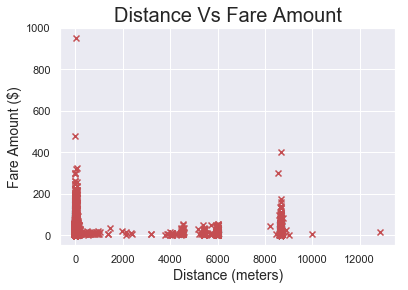

In [41]:
plt.scatter(training_set['Distance'] , training_set['fare_amount'] , c = 'r' , marker = 'x')
plt.title('Distance Vs Fare Amount',size = 20)
plt.xlabel('Distance (meters)',size = 14)
plt.ylabel('Fare Amount ($)',size = 14)
plt.show()

## Support Vector Regression on Feature Distance 

In [52]:
data = training_set.sample(n = 100 , replace = False)
X = np.array(data['Distance']).reshape(len(data),1)
y = np.array(data['fare_amount'])


In [53]:
def svr_linear(X,y):
    svr_lin = SVR(kernel='linear', C=100, gamma='auto')
    y_lin = svr_lin.fit(X, y).predict(X)
    
    return svr_lin

def svr_polynomial(X,y):
    svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
    y_poly = svr_poly.fit(X, y).predict(X)

    return svr_poly

def svr_RBF(X,y):
    svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
    y_rbf = svr_rbf.fit(X, y).predict(X)
    
    return svr_rbf

In [54]:
from sklearn.svm import SVR
from multiprocessing.pool import ThreadPool
pool = ThreadPool(processes=1)

t1 = pool.apply_async(svr_polynomial,(X,y,)) 
t2 = pool.apply_async(svr_RBF, (X,y,)) 
t3 = pool.apply_async(svr_linear, (X,y,)) 

svr_poly = t1.get()
svr_rbf = t2.get()
svr_lin = t3.get()

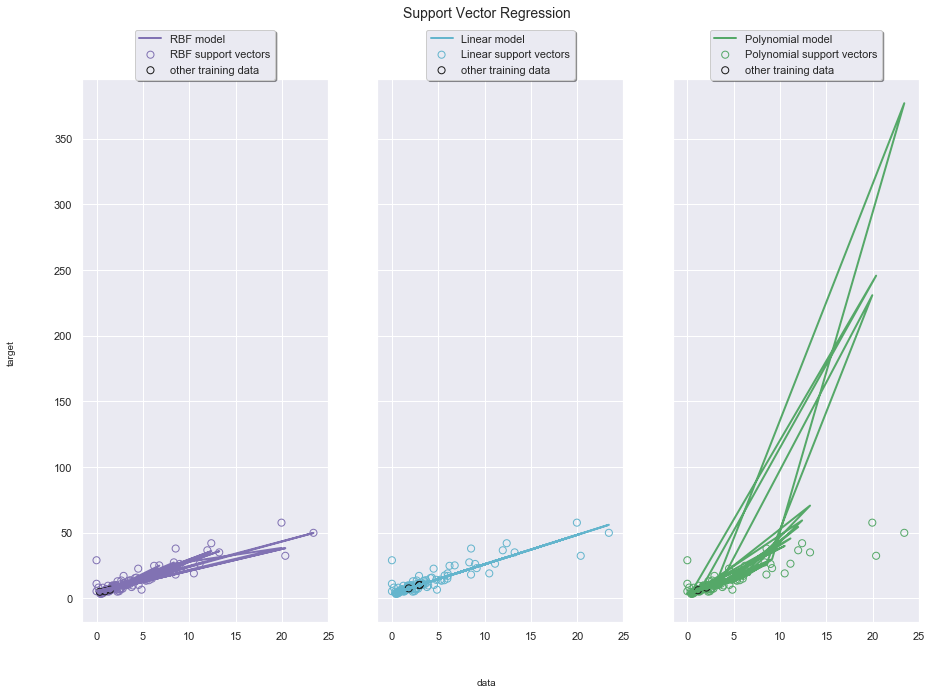

In [55]:
lw = 2
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

X_predict = np.array(dev_set['Distance']).reshape(len(dev_set),1)
y_predict = np.array(dev_set['fare_amount'])

SGD_predict = svr_SGD.predict(X)
SGD_squared_predict = svr_SGD_squared.predict(X)

SGD_error = mean_squared_error(y, SGD_predict)

SGD_squared_error = mean_squared_error(y, SGD_squared_predict)

print(SGD_error,SGD_squared_error)

In [ ]:
SGD_predict_val = np.concatenate((svr_SGD.predict(X_predict).reshape(len(dev_set),1),y_predict.reshape(len(dev_set),1)) , axis = 1)
SGD_squared_predict_val = np.concatenate((svr_SGD_squared.predict(X_predict).reshape(len(dev_set),1),y_predict.reshape(len(dev_set),1)) , axis = 1)

In [ ]:
SGD_predict_val

In [ ]:
SGD_squared_predict_val